In [5]:
# Initialize Otter
import otter
grader = otter.Notebook("hw06.ipynb")

# Tarea 6: Probabilidad, Simulación, Estimación y Evaluación de Modelos

Por favor, completa este notebook llenando las celdas proporcionadas. Antes de comenzar, ejecuta la celda anterior para cargar las pruebas proporcionadas.

<!-- BEGIN QUESTION -->

Ingrese su nombre en la siguiente celda:
```python
Nombre = "Marie Curie"
Carnet =  "27182818 "
```

In [6]:
Nombre = "Gustavo Castrillón"
Carnet = "6666666666"

<!-- END QUESTION -->



In [7]:
# Run this cell to set up the notebook, but please don't change it.
# These lines import the Numpy and Datascience modules.
import numpy as np
from datascience import *

# These lines do some fancy plotting magic.
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import warnings
warnings.simplefilter('ignore', FutureWarning)

**Recurso Útil:**
- [Referencia de Python](http://data8.org/fa23/reference/): Hoja de trucos con métodos útiles de arrays y tablas utilizados en Data 8.

**Lecturas Recomendadas**: 
* [Aleatoriedad](https://www.inferentialthinking.com/chapters/09/Randomness.html)
* [Muestreo y Distribuciones Empíricas](https://www.inferentialthinking.com/chapters/10/Sampling_and_Empirical_Distributions.html)
* [Pruebas de Hipótesis](https://www.inferentialthinking.com/chapters/11/Testing_Hypotheses.html)

Por favor, completa este notebook llenando las celdas proporcionadas. **Antes de comenzar, ejecuta la celda a continuación para configurar el notebook importando algunas librerías útiles.** Cada vez que inicies tu servidor, necesitarás ejecutar esta celda nuevamente.

Para todos los problemas en los que debes escribir explicaciones y oraciones, **debes** proporcionar tu respuesta en el espacio designado. Además, a lo largo de esta tarea y futuras, **asegúrate de no reasignar variables en todo el notebook.** Por ejemplo, si utilizas `max_temperature` en tu respuesta a una pregunta, no la reasignes más adelante. De lo contrario, fallarás en pruebas que pensabas estar aprobando.



## 1. Ruleta

Una ruleta  tiene 38 casillas y una pequeña bola que descansa sobre la rueda. Cuando la rueda gira, la bola se detiene en una de las 38 casillas. Esa casilla se declara ganadora.

Las casillas están etiquetadas como 0, 00, 1, 2, 3, 4, ... , 36. Las casillas 0 y 00 son verdes, y las demás casillas se alternan entre rojo y negro. La tabla `wheel` representa una ruleta. **Nota que *ambas* columnas consisten en cadenas de texto.** A continuación, se muestra un ejemplo de una ruleta.


<img src="roulette_wheel.jpeg" width="330px">


Ejecuta la celda a continuación para cargar la tabla `rueda`.

In [4]:
wheel = Table.read_table('roulette_wheel.csv', dtype=str)
wheel

Pocket,Color
00,green
0,green
1,red
2,black
3,red
4,black
5,red
6,black
7,red
8,black


### Apostando al Rojo ###

Si apuestas al *rojo*, estás apostando a que la casilla ganadora será roja. Esta apuesta *paga 1 a 1*. Esto significa que si realizas una apuesta de un dólar al rojo, entonces:

- Si la casilla ganadora es roja, ganas 1 dólar. Es decir, recuperas tu dólar original, más un dólar adicional.
- Si la casilla ganadora no es roja, pierdes tu dólar. En otras palabras, ganas -1 dólar.

Veamos si puedes ganar dinero apostando al rojo en la ruleta.

**Pregunta 1.** Define una función llamada `apuesta_dolar_en_rojo` que tome el nombre de un color y devuelva tu ganancia en dólares si ese color hubiera ganado y hubieras apostado un dólar al rojo. Recuerda que la ganancia puede ser negativa. Asegúrate de que tu función devuelva un número entero. **(4 puntos)**

*Nota:* Puedes asumir que los únicos colores que se pasarán como argumentos son rojo, negro y verde. Tu función no necesita verificar esto.

In [8]:
def apuesta_dolar_al_rojo(color):
    if color == 'red':
        return 1
    else: 
        return -1

Ejecuta la celda a continuación para asegurarte de que tu función está funcionando correctamente.

In [9]:
print(apuesta_dolar_al_rojo('green'))
print(apuesta_dolar_al_rojo('black'))
print(apuesta_dolar_al_rojo('red'))

-1
-1
1


In [10]:
grader.check("q1")

q1 results: All test cases passed!

**Pregunta 2.** Agrega una columna etiquetada como `win:Red` a la tabla `wheel`. Para cada casilla, la columna debe contener tu ganancia en dólares si esa casilla ganó y habías apostado un dólar al rojo. Tu código debe utilizar la función `apuesta_dolar_al_rojo`. **(4 puntos)**

> *Pista:* No deberías necesitar un bucle `for` para esta pregunta; en su lugar, intenta usar un método de tabla.

In [14]:
datos = wheel.apply(apuesta_dolar_al_rojo, 'Color')
wheel = wheel.with_column('win:Red',datos)
wheel

Pocket,Color,win:Red
00,green,-1
0,green,-1
1,red,1
2,black,-1
3,red,1
4,black,-1
5,red,1
6,black,-1
7,red,1
8,black,-1


In [15]:
grader.check("q2")

q2 results: All test cases passed!

### Simulando 10 Apuestas al Rojo

Las ruedas de ruleta están diseñadas de tal manera que cada vez que se giran, la casilla ganadora tiene la misma probabilidad de ser cualquiera de las 38 casillas, independientemente de los resultados de todos los demás giros. Vamos a analizar lo que sucedería si decidimos apostar un dólar al rojo en cada ronda.



**Pregunta 3.** Crea una tabla `diez_apuestas` tomando muestras de la tabla `ruleta` para simular 10 giros de la rueda de ruleta. Tu tabla debe tener las mismas tres etiquetas de columna que `ruleta`. Una vez que hayas creado esa tabla, configura `suma_apuestas` con tu ganancia neta en las 10 apuestas, asumiendo que apostaste un dólar al rojo en cada ocasión. **(4 puntos)**

*Sugerencia:* Podría ser útil imprimir `diez_apuestas` después de crearla.

In [19]:
diez_apuestas = wheel.sample(10)
suma_apuestas = diez_apuestas.column('win:Red').sum()
diez_apuestas, suma_apuestas

(Pocket | Color | win:Red
 7      | red   | 1
 00     | green | -1
 7      | red   | 1
 2      | black | -1
 33     | black | -1
 17     | black | -1
 33     | black | -1
 24     | black | -1
 32     | red   | 1
 11     | black | -1,
 -4)

In [22]:
grader.check("q3")

q3 results: All test cases passed!

Ejecuta las celdas anteriores varias veces para observar cuánto dinero ganarías si realizaras 10 apuestas de un dólar al color rojo. Terminar con una cantidad negativa de dinero no es una buena sensación, pero es una realidad en el mundo de las apuestas. Los casinos son negocios, y obtienen ganancias cuando los apostadores pierden.

**Pregunta 4.** Vamos a analizar qué sucedería si realizaras más apuestas. Define una función llamada `ganancia_neta_rojo` que tome como argumento el número de apuestas y devuelva la ganancia neta de realizar ese número de apuestas de un dólar en el color rojo. **(4 puntos)**

*Pista:* Deberías utilizar tu tabla `ruleta` dentro de la función.

In [25]:
def ganancia_neta_rojo(cantidad_apuestas):
    ganancia = wheel.sample(cantidad_apuestas).column('win:Red').sum()
    return ganancia

In [32]:
ganancia_neta_rojo(1000)

-22

In [26]:
grader.check("q4")

q4 results: All test cases passed!

Ejecuta la siguiente celda varias veces para asegurarte de que los resultados sean similares a los que observaste en el ejercicio anterior.

In [38]:
ganancia_neta_rojo(10)

4

**Pregunta 5.** Completa la celda a continuación para simular la ganancia neta en 200 apuestas de un dólar al rojo, repitiendo el proceso 10,000 veces. Después de ejecutar la celda, `ganancias_simuladas_rojo` debería ser un arreglo con 10,000 entradas, cada una representando la ganancia neta en 200 apuestas de un dólar al rojo. **(4 puntos)**

*Pista:* Piensa en qué herramienta computacional podría ser útil para simular un proceso múltiples veces. El laboratorio 5 podría ser un buen recurso para consultar.

*Nota:* Esta celda podría tardar unos segundos en ejecutarse.

In [41]:

ganancias_simuladas_rojo= [] 
for i in range(0, 10000,1):
    ganancias_simuladas_rojo.append(ganancia_neta_rojo(200))

#ganancias_simuladas_rojo

In [42]:
grader.check("q5")

q5 results: All test cases passed!

Ejecuta la celda a continuación para visualizar los resultados de tu simulación.

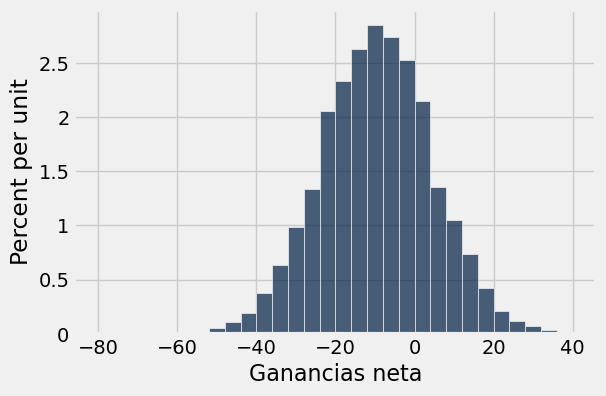

In [43]:
ganancias = Table().with_columns('Ganancias neta', ganancias_simuladas_rojo)
ganancias.hist(bins = np.arange(-80, 41, 4))

**Pregunta 6:** Usando el histograma anterior, decide si la siguiente afirmación es verdadera o falsa:

>Si realizas 200 apuestas de un dólar al rojo, tu probabilidad de perder dinero es superior al 50%.

Asigna `perder_mas_del_50` a `True` o `False` dependiendo de tu respuesta a la pregunta. **(2 puntos)**

In [44]:
perder_mas_del_50=True

In [45]:
grader.check("q6")

q6 results: All test cases passed!

### Apostar a un Separador ###

Si apostar al rojo no parece una buena idea, tal vez un apostador quiera intentar una apuesta diferente. Una apuesta a un *separador* es una apuesta a dos números consecutivos, como el 5 y el 6. Esta apuesta paga 17 a 1. Eso significa que si haces una apuesta de un dólar al separador 5 y 6, entonces:

- Si la casilla ganadora es el 5 o el 6, tu ganancia es de 17 dólares.
- Si cualquier otra casilla gana, pierdes tu dólar, así que tu ganancia es de -1 dólares.

**Pregunta 7.** Define una función `apostar_en_separador` que reciba un número de casilla y devuelva tu ganancia en dólares si esa casilla ganó y habías apostado un dólar al separador 5-6. **(4 puntos)**

*Pista:* Recuerda que los números de las casillas están representados como cadenas.

In [48]:
def apostar_en_separador(casilla):
    if (casilla == '5') or (casilla == '6'): 
        return 17
    else: 
        return -1

In [49]:
grader.check("q7")

q7 results: All test cases passed!

Ejecute la celda a continuación para verificar que su función esté realizando la tarea correctamente.

In [50]:
print(apostar_en_separador('5'))
print(apostar_en_separador('6'))
print(apostar_en_separador('00'))
print(apostar_en_separador('23'))

17
17
-1
-1


**Pregunta 8.** Añade una columna llamada `Winnings: Split` a la tabla `wheel`. Para cada casilla, la columna debe contener tus ganancias en dólares si esa casilla ganara y hubieras apostado un dólar en la división 5-6. **(4 puntos)**

In [52]:
wheel = wheel.with_column('Winnigs: Split', wheel.apply(apostar_en_separador,'Pocket'))

In [53]:
wheel

Pocket,Color,win:Red,Winnigs: Split
00,green,-1,-1
0,green,-1,-1
1,red,1,-1
2,black,-1,-1
3,red,1,-1
4,black,-1,-1
5,red,1,17
6,black,-1,17
7,red,1,-1
8,black,-1,-1


In [54]:
grader.check("q8")

q8 results: All test cases passed!

**Pregunta 9.** Simula la ganancia neta de 200 apuestas de un dólar en la división 5-6, repitiendo el proceso 10,000 veces y guardando tus ganancias en el arreglo `simulated_gains_split`. **(5 puntos)**

*Sugerencia:* ¡Tu código en las Preguntas 4 y 5 puede ser útil aquí!

In [62]:
def simulacion_ganancias(N):
    ganancia = wheel.sample(N).column('Winnigs: Split').sum()
    return ganancia
    
trials = 10000
simulando_ganancias_neta = []
for _ in range(trials):
    simulando_ganancias_neta = np.append(simulando_ganancias_neta,simulacion_ganancias(200))
simulando_ganancias_neta

array([-92., -92.,  -2., ..., -74.,  -2., -74.])

In [64]:
simulacion_ganancias(200)

88

In [63]:
grader.check("q9")

q9 results: All test cases passed!

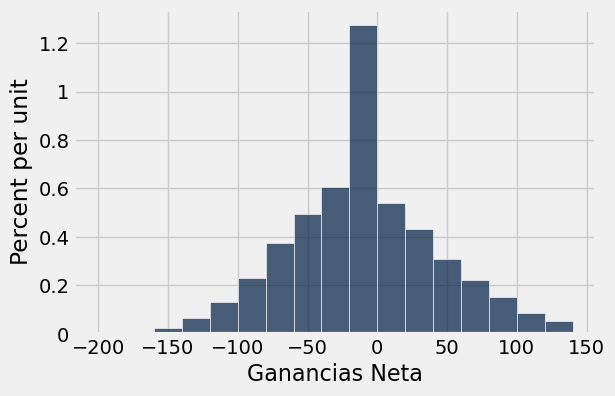

In [65]:
ganancias = Table().with_columns('Ganancias Neta', simulando_ganancias_neta)
ganancias.hist(bins = np.arange(-200, 150, 20))

**Pregunta 10.** Observa detenidamente la visualización anterior y asigna `histogram_statements` a un arreglo con los números de cada una de las afirmaciones a continuación que se pueden inferir correctamente del histograma superpuesto. **(2 puntos)**

1. Si apuestas un dólar 200 veces en un número dividido ('5'-'6'), tu probabilidad de perder dinero es más del 50%.
2. Si apuestas un dólar 200 veces en la ruleta, tu probabilidad de ganar más de 50 dólares es mayor, si apuestas a un número dividido cada vez, que si apuestas al rojo cada vez.
3. Si apuestas un dólar 200 veces en la ruleta, tu probabilidad de perder más de 50 dólares es mayor, si apuestas a un número dividido cada vez, que si apuestas al rojo cada vez.

*Pista:* Ya hemos visto una de estas afirmaciones en una pregunta anterior.

In [72]:
histogram_statements=make_array(1,2)

In [78]:
grader.check("q10")

q10 results: All test cases passed!

Si este ejercicio te ha desmotivado para jugar a la ruleta, ha cumplido su objetivo. Si aún sientes curiosidad por otras apuestas, [aquí](https://es.wikipedia.org/wiki/Ruleta#Tabla_de_odds_de_apuestas) puedes encontrarlas, y [aquí](https://es.wikipedia.org/wiki/Ruleta#Ventaja_de_la_casa) está la mala noticia. La casa – es decir, el casino – siempre tiene ventaja sobre el jugador.

## 2. Oportunidades


Antes de realizar este ejercicio, asegúrate de comprender la lógica detrás de todos los ejemplos en [Sección 9.5](https://inferentialthinking.com/chapters/09/5/Finding_Probabilities.html).

Buenas estrategias para abordar cálculos de probabilidad incluyen:

- Pensar en un ensayo a la vez: ¿Qué debe ser el primero? ¿Y después qué debe ser el siguiente?
- Dividir el evento en maneras distintas en las que puede ocurrir.
- Ver si es más fácil encontrar la probabilidad de que el evento no ocurra.

### Encontrando Probabilidades

En cada giro de una rueda de ruleta, los 38 casilleros tienen la misma probabilidad de resultar ganadores, independientemente de los resultados de otros giros. De los 38 casilleros, 18 son rojos, 18 son negros y 2 son verdes. En cada parte a continuación, escribe una expresión que evalúe la probabilidad del evento descrito.

**Pregunta 1.** ¿Cuál es la probabilidad de que el casillero ganador sea negro en cada uno de los tres primeros giros consecutivos? **(3 puntos)**

Piensa en : 
- ¿Cuál es la probabilidad de que un solo giro dé como resultado un casillero negro?, Pista: hay 18 casilleros negros de un total de 38. ¿cómo puedes combinar las probabilidades de que cada uno de los tres giros dé negro?




In [76]:
primeros_casilleros_negros = (18/38)**3

In [77]:
grader.check("q10")

q10 results: All test cases passed!


**Pregunta 2.** ¿Cuál es la probabilidad de que **ninguno** de los primeros 10 giros de una ruleta tenga como resultado un casillero verde? **(3 puntos)**

Piensa en:  
- ¿Cuántos casilleros **no verdes** hay en la ruleta? Pista: de los 38 casilleros, 2 son verdes.  
- ¿Cuál es la probabilidad de que un solo giro **no sea verde**?  
- Si los giros son independientes entre sí, ¿cómo puedes combinar las probabilidades de que ninguno de los 10 resulte verde?



In [ ]:
prob_no_verde_10_giros=...


In [ ]:
grader.check("q11")

**Pregunta 3.** ¿Cuál es la probabilidad de que el casillero verde gane **al menos una vez** durante los primeros 10 giros de la ruleta? **(3 puntos)**

Piensa en:  
- ¿Qué significa “al menos una vez”? ¿Cómo puedes reformular ese evento usando su complemento (es decir, que **nunca** salga verde)?  
- Ya sabes calcular la probabilidad de que ningún giro resulte verde. ¿Cómo puedes usar esa información para obtener la probabilidad de que **sí** ocurra al menos una vez?


In [ ]:
p_verde_al_menos_una = ...

In [ ]:
grader.check("q12")

**Pregunta 4.** ¿Cuál es la probabilidad de que, en los primeros 10 giros de la ruleta, **solo uno de los tres colores** (rojo, negro o verde) gane en todas las vueltas? Es decir, que **dos de los tres colores nunca ganen**. **(3 puntos)**

Piensa en:  
- ¿Qué significa que dos colores nunca ganen?  
  Pista: implica que los 10 resultados pertenecen únicamente a un mismo color.  
- ¿Cuántas maneras hay de que esto ocurra? ¿Qué probabilidades corresponden a obtener 10 veces seguidas rojo, negro o verde?  
- ¿Cómo puedes combinar estos casos, si son mutuamente excluyentes?



In [ ]:
p_solo_un_color=...


In [ ]:
grader.check("q13")

### Comparando Probabilidades

En cada una de las Preguntas 5-7, se describen dos eventos A y B. Elige una de las siguientes tres opciones y establece cada variable de respuesta a un solo número entero:

1. El evento A es más probable que el evento B.
2. El evento B es más probable que el evento A.
3. Ambos eventos tienen la misma probabilidad.

Deberías poder tomar las decisiones **sin realizar cálculos**. Buenos enfoques para este ejercicio incluyen imaginar que realizas los experimentos de probabilidad tú mismo, un ensayo a la vez, y pensar sobre la [ley de los promedios](https://inferentialthinking.com/chapters/10/1/Empirical_Distributions.html#the-law-of-averages).

**Pregunta 5. Verdadero o Falso**

Un niño elige al azar cuatro veces de una caja que contiene cuatro animales de juguete: un oso, un elefante, una jirafa y un canguro.

**Enunciado:**  
Es más probable que el niño obtenga los cuatro animales diferentes si selecciona **sin reemplazo** que si selecciona **con reemplazo**.

Asigna a la variable escogencia_5 True o False segun sea tu respuesta

In [ ]:
escogencia_5=...


In [ ]:
grader.check("q14")

**Pregunta 6. Verdadero o Falso (2 puntos)**

En una lotería, se extraen al azar dos números **con reemplazo** de los enteros del 1 al 1000.


Es más probable que el número **8** sea seleccionado en ambas extracciones que obtener **el mismo número cualquiera** en ambas extracciones.

Asigna a la variable `escogencia_6` **True** o **False** 


In [ ]:
escogencia_6=...


In [ ]:
grader.check("q15")

**Pregunta 7. Verdadero o Falso **

Se lanza una moneda justa repetidamente.

**Enunciado:**  
Es más probable obtener **60 o más caras en 100 lanzamientos** que obtener **600 o más caras en 1000 lanzamientos**.

Asigna a la variable `escogencia` **True** o **False** según sea tu respuesta.


In [ ]:
escogencia_7=...


In [ ]:
grader.check("q16")

## 3. Tres maneras en que Python genera muestras aleatorias

En esta sección, discutiremos tres métodos diferentes que Python ofrece para generar muestras aleatorias. Esta capacidad es extremadamente útil en el análisis de datos y estadísticas, permitiéndonos trabajar con conjuntos de datos más manejables, realizar simulaciones y garantizar la imparcialidad en experimentos. Utilizando las funciones adecuadas, podemos asegurarnos de que las muestras tengan las características y tamaño deseados. Exploraremos cada método y proporcionaremos ejemplos prácticos para comprender su uso y aplicación en situaciones del mundo real.

Has aprendido tres formas de extraer muestras aleatorias utilizando Python:

- `tbl.sample` extrae una muestra aleatoria de filas de la tabla `tbl`. El resultado es una tabla que consta de las filas seleccionadas.

- `np.random.choice` extrae una muestra aleatoria de una población cuyos elementos están en un arreglo. El resultado es un arreglo que contiene los elementos seleccionados.

- `sample_proportions` extrae de una distribución categórica cuyas proporciones están en un arreglo. El resultado es un arreglo que contiene las proporciones seleccionadas en todas las categorías.

In [ ]:
# Revisa este código y ejecuta esta celda para las preguntas 1 y 2
# Cargar los datos y seleccionar columnas relevantes
peliculas_top = Table.read_table('top_movies_2017.csv').select(0, 1)
peliculas_top.show(3)

In [ ]:

# Agrupar por estudio y ordenar por cantidad de películas
estudios_con_cantidad = peliculas_top.group('Studio').sort('count', descending=True)
estudios_con_cantidad.show(3)


In [ ]:

# Extraer las columnas de estudios
estudios_de_todas_las_peliculas = peliculas_top.column('Studio')
estudios_distintos = estudios_con_cantidad.column('Studio')


In [ ]:
print("estudios_de_todas_las_peliculas:", estudios_de_todas_las_peliculas[:10], "...")
print("\nestudios_distintos:", estudios_distintos)


In [ ]:

# Extraer solo los conteos y calcular proporciones de películas por estudio
cantidades_solo = estudios_con_cantidad.column('count')
proporciones_solo = cantidades_solo / sum(cantidades_solo)

print("cantidades_solo:", cantidades_solo)
print("\nproporciones_solo:", proporciones_solo)


En las Preguntas 1 y 2 se presentará un escenario. Para cada uno, deberás responder si el resultado deseado puede lograrse utilizando una función dada y alguno de los siguientes arreglos o tablas: `peliculas_top`, `estudios_con_cantidad`, `estudios_de_todas_las_peliculas`, `estudios_distintos`, `cantidades_solo` y `proporciones_solo`.

_Nota: **No** expliques tu respuesta; simplemente responde sí o no y escribe el nombre del arreglo o tabla correspondiente._


**Pregunta 1.** Simula una muestra de 10 películas seleccionadas al azar con reemplazo a partir de un total de 200 películas. Usando únicamente esta muestra, ¿tenemos suficiente información para determinar si Paramount aparece más veces que Warner Brothers entre los estudios de las películas seleccionadas? 


***Nota:*** No expliques tu respuesta para ninguna de las opciones que elijas; por favor, sigue únicamente el formato del ejemplo dado.

*Ejemplo de respuesta:* Sí, sobre `peliculas_top`.


"Escribe tu respuesta aqui"

**Pregunta 1(a).** ¿Es posible realizar esto utilizando la función `sample`? Si es así, ¿sobre qué tabla aplicaríamos `sample`? **(1 punto)**



"Escribe tu respuesta aqui"

**Pregunta 1(b).** ¿Es posible hacer esto usando la función `np.random.choice`? Si es así, ¿sobre qué arreglo aplicaríamos `np.random.choice`? **(1 punto)**



"Escribe tu respuesta aqui"

**Pregunta 1(c).** ¿Se puede hacer esto usando la función `sample_proportions`? Si es así, ¿sobre qué arreglo llamaríamos a `sample_proportions`? **(1 punto)**




"Escribe tu respuesta aqui"

**Pregunta 2.** Simula una muestra de 10 películas seleccionadas al azar con reemplazo a partir de un total de 200 películas. Usando únicamente esta muestra, ¿tienes suficiente información para determinar si la primera película seleccionada fue lanzada por el mismo estudio que la última película seleccionada? 

***Nota:*** No expliques tu respuesta para ninguna de las opciones que elijas; por favor, sigue únicamente el formato del ejemplo proporcionado.


**Pregunta 2(a).** ¿Es posible hacer esto utilizando la función `sample`? Si es así, ¿sobre qué tabla aplicaríamos `sample`? **(1 punto)**



"Escribe tu respuesta aqui"

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

**Pregunta 2(b)** ¿Es posible realizar esto usando la función `np.random.choice`? Si es así, ¿sobre qué array aplicaríamos `np.random.choice`? **(1 punto)**

"Escribe tu respuesta aqui"

<!-- FIN DE LA PREGUNTA -->

<!-- INICIO DE LA PREGUNTA -->

**Pregunta 2(c)** ¿Se puede hacer esto usando la función `sample_proportions`? Si es así, ¿en qué arreglo llamaríamos a `sample_proportions`? **(1 punto)**

"Escribe tu respuesta aqui"

## 4. Evaluación de los Modelos de Jade

Antes de comenzar, la [Sección 10.4](https://inferentialthinking.com/chapters/10/4/Random_Sampling_in_Python.html) del libro de texto es una referencia útil para esta parte.

### Juegos con Jade

Nuestra amiga Jade viene de visita y nos propone un juego con cartas. Las reglas son las siguientes:

> Usaremos un mazo simplificado de 13 cartas: 4 cartas con figura (A, J, Q, K) y 9 cartas numeradas (2, 3, 4, 5, 6, 7, 8, 9, 10).  
>
> Se sacarán cartas **al azar con reemplazo**, un total de 13 veces.  
>
> - Si se obtienen **4 o más cartas con figura**, nosotros perdemos.  
> - Si se obtienen menos de 4 cartas con figura, Jade pierde.

Jugamos una partida y perdemos, al obtener **8 cartas con figura**. Frustrados, acusamos a Jade de hacer trampa, pero ella insiste en que el mazo es completamente justo.

Según Jade, todas las cartas (A, 2, 3, 4, 5, 6, 7, 8, 9, 10, J, Q, K) tienen **igual probabilidad de ser seleccionadas**. Sin embargo, nosotros sospechamos que el mazo ha sido manipulado para favorecer las cartas con figura (A, J, Q, K) frente a las cartas numeradas.


**Pregunta 1.**  
Asigna a la variable `deck_model_probabilities` un arreglo de dos elementos:

- El primer elemento debe ser la probabilidad de extraer una carta con figura (J, Q, K o A).
- El segundo elemento debe ser la probabilidad de extraer una carta con número (2–10).

Estas probabilidades deben reflejar el modelo propuesto por Jade, quien afirma que todas las cartas del mazo tienen la misma probabilidad de ser seleccionadas. Asegúrate de que los valores estén entre 0 y 1, y que representen una distribución de probabilidad válida.  


In [ ]:
deck_model_probabilities=make_array(...,....)


In [ ]:
grader.check("q25")

**Pregunta 2.**  
Sospechamos que el modelo de Jade es incorrecto. En particular, creemos que la probabilidad de obtener una carta con figura es **mayor** que la que Jade propone.

Durante nuestra simulación, ¿cuál de las siguientes estadísticas deberíamos usar para comparar el modelo de Jade con nuestra hipótesis alternativa?  
Asigna la variable `statistic_choice` a la opción correcta.  

1. La distancia (valor absoluto) entre el número real de cartas de figura en 13 extracciones y 4, el número esperado de cartas de figura según el modelo de Jade.  
2. El número esperado de cartas de figura en 13 extracciones.  
3. El número de cartas de figura que obtenemos en 13 extracciones.



In [ ]:
statistic_choice=...


In [ ]:
grader.check("q26")

**Pregunta 3.**  
Define la función `deck_simulation_and_statistic`, que reciba dos argumentos:

- `tamano_muestra`: el número de cartas a extraer en la simulación,
- `model_proportions`: un arreglo con las probabilidades del modelo (como `deck_model_probabilities` creado en la Pregunta 1).

La función debe retornar el **número de cartas con figura** obtenidas en una simulación de extracción aleatoria con reemplazo, utilizando las proporciones dadas en `model_proportions`.

**(5 puntos)**

*Sugerencia:* Puedes utilizar la función `sample_proportions`.


In [ ]:
def deck_simulation_and_statistic(tamano_muestra, model_proportions):
    ...
    ...
deck_simulation_and_statistic(13, deck_model_probabilities)


In [ ]:
grader.check("q27")

**Pregunta 4.**  
Usa la función que definiste anteriormente (`deck_simulation_and_statistic`) para simular el sorteo de 13 cartas, **5000 veces**, bajo las proporciones del modelo que especificaste en la Pregunta 1 (`deck_model_probabilities`).

Guarda el resultado de cada simulación (el número de cartas con figura) en un arreglo llamado `deck_statistics`.  
**(5 puntos)**


In [ ]:
deck_statistics = make_array()
repetitions=5000
for _ in np.arange(repetitions):
    ...
    ...



In [ ]:
grader.check("q28")

Analicemos las distribuciones estadisticas simuladas

In [ ]:
# Draw a distribution of statistics 
Table().with_column('Deck Statistics', deck_statistics).hist()

<!-- BEGIN QUESTION -->

**Pregunta 5.** Dado el valor que observaste, ¿crees que el modelo de Jade es razonable, o es más probable nuestra alternativa (que nuestra baraja está trucada)? Explica tu respuesta utilizando el histograma de estadísticas simuladas usando el modelo de Jade (producido anteriormente). **(4 Puntos)**

Escribe tu respuesta aqui

¡Has terminado la Tarea 6!

**Pasos importantes para la entrega:**
1. Ejecuta las pruebas y verifica que todas pasen correctamente.
2. Elige **Guardar Notebook** en el menú **Archivo**, luego **ejecuta la celda final**.
3. Haz clic en el enlace para descargar el archivo zip.

**Es tu responsabilidad asegurarte de que tu trabajo esté guardado antes de ejecutar la última celda.**

## Mascotas de Data 8

Oz te felicita por haber terminado la Tarea 6.

<img src="OZ.jpg" width="30%" alt="Primer plano de un perro sonriendo, sentado entre hojas."/>


## Envío

Asegúrate de haber ejecutado todas las celdas de tu notebook en orden antes de ejecutar la celda a continuación, para que todas las imágenes y gráficos aparezcan en el resultado. La celda a continuación generará un archivo zip para que lo envíes. **Por favor, guarda antes de exportar.**

In [ ]:
pwd

## Submission

Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output. The cell below will generate a zip file for you to submit. **Please save before exporting!**

These are some submission instructions.

In [ ]:
# Save your notebook first, then run this cell to export your submission.
grader.export(run_tests=True)